Programmation d'une matrice symétrique à diagonaliser + déterminer les vecteurs propres

In [2]:
import numpy as np
from numpy.linalg import inv
from numpy.linalg import det
from numpy.linalg import eig

A = np.array([[3, 2, 1], [2, 3, 2], [1, 2, 3]])
print(A)

a=det(A)
print('Le déterminant de la matrice A est égal à :', a)

D, P = np.linalg.eig(A)
print('Les vecteurs propres de la matrice A sont', P)
print('Et les valeurs propres sont', D)

D_diagonale = np.diag(D)
print('La matrice diagonalisée de D est:', D_diagonale)

A_verif = P @ D_diagonale @ inv(P)          #'*' pour produit d'élément et '@' pour produit matriciel
print('La matrice reconstruite est :', A_verif)


[[3 2 1]
 [2 3 2]
 [1 2 3]]
Le déterminant de la matrice A est égal à : 8.000000000000002
Les vecteurs propres de la matrice A sont [[-5.41774320e-01 -7.07106781e-01  4.54401349e-01]
 [-6.42620551e-01 -7.86181869e-17 -7.66184591e-01]
 [-5.41774320e-01  7.07106781e-01  4.54401349e-01]]
Et les valeurs propres sont [6.37228132 2.         0.62771868]
La matrice diagonalisée de D est: [[6.37228132 0.         0.        ]
 [0.         2.         0.        ]
 [0.         0.         0.62771868]]
La matrice reconstruite est : [[3. 2. 1.]
 [2. 3. 2.]
 [1. 2. 3.]]


# Programmation de la matrice Huckel du butadiène  + déterminer les énergies des OM liantes qui donne l'énergie globale de la molécule
 Généralisation pour 2 autres molécules (éthylène et benzène)

In [3]:
import numpy as np
from numpy.linalg import eigh

a = 0
b = -1

Ethylene = np.array([[a, b], 
                    [b, a]])

Butadiene = np.array([[a, b, 0, 0], 
                      [b, a, b, 0], 
                      [0, b, a, b], 
                      [0, 0, b, a]])

Benzène = np.array([[a, b, 0, 0, 0, b], 
                    [b, a, b, 0, 0, 0], 
                    [0, b, a, b, 0, 0],
                    [0, 0, b, a, b, 0], 
                    [0, 0, 0, b, a, b], 
                    [b, 0, 0, 0, b, a]])

molecule = Benzène

valeurs_propres, vecteurs_propres = np.linalg.eig(molecule)


valeurs_propres = sorted(valeurs_propres, reverse=True)                 #Trie des valeurs propres pour bien distinguer l'ordre des OM (De la plus stable à la moins stable)
valeurs_propres = [round(float(val), 5)for val in valeurs_propres]      #Arrondi les valeurs propres ( 5 chiffres sgnificatifs et les rends plus visibles (sans le 'np.float64')

print('Les valeurs propres du butadiène sont :', valeurs_propres)

e = len(molecule)
OM_occupées = e//2 
valeurs_propres_OM_occupées =  valeurs_propres[:OM_occupées]
E_pi = 2 * (sum(valeurs_propres_OM_occupées))

print('La valeur de E_pi est :', E_pi, 'β +', e, 'α')

Les valeurs propres du butadiène sont : [2.0, 1.0, 1.0, -1.0, -1.0, -2.0]
La valeur de E_pi est : 8.0 β + 6 α


Programmation de lecture de fichier .xyz + former la matrice de cette molécule pour en tirer l'énergie des liaisons pi.

In [4]:
#fonction lire_xyz du programme d'Emma

import numpy as np
import sys

# Distances des liaisons simples et doubles entre atomes de carbone (en Å)
DISTANCES_LIAISONS = {
    ('C', 'C'): {'simple': 1.54, 'double': 1.34}}

TOLERANCE = 0.07  # Tolérance sur la distance (en Å)

#Lecture du fichier .xyz

def lire_xyz(fichier):
    """Lire un fichier .xyz et renvoyer les coordonnees des atomes dans l'ordre (x, y, z)."""
    try:
        with open(fichier, 'r') as file:
            lines = file.readlines()            
            # Nettoyer les lignes : enlever les espaces en trop, et ignorer les
            # lignes vides ou les commentaires
            lines = [line.strip() for line in lines if line.strip()]

            try:
                n = int(lines[0])
            except ValueError:
                print(
                    f"Erreur : La premiere ligne du fichier {fichier} ne contient pas un entier valide.")
                sys.exit(1)

            print(f"Nombre d'atomes dans le fichier : {n}")

            atomes = []
            # On commence à  la ligne 1 (index 1) car la ligne 1 du fichier original a été ignorée
            for i in range(1, n + 1):
                if i >= len(lines):
                    print(f"Erreur : Le fichier contient moins de lignes que prÃ©vu ({n} atomes).")
                    sys.exit(1)
                    
                ligne = lines[i].split()

                # Si la longueur de la ligne est inférieure à 4 valeurs = erreur ?
                if len(ligne) < 4:
                    print(
                        f"Erreur : Format incorrect Ã  la ligne {i+1} dans le fichier {fichier}.")
                    sys.exit(1)

                element = ligne[0]  # Le type d'element atomique
                try:
                    # Recuperer les coordonnees x, y et z
                    x, y, z = map(float, ligne[1:4])
                except ValueError:
                    print(
                        f"Erreur : Les coordonnees à la ligne {i+1} ne sont pas des nombres valides.")
                    sys.exit(1)
                atomes.append((element, x, y, z))  # Conserver cet ordre (x, y, z)
        return atomes
    except FileNotFoundError:
        print(f"Erreur : Le fichier {fichier} n'existe pas.")
        sys.exit(1)

#Calcul distance entre deux atomes pour savoir s'ils sont liés
def calcul_distance(coord1, coord2):
    delta_x = coord1[0] - coord2[0]
    delta_y = coord1[1] - coord2[1]
    delta_z = coord1[2] - coord2[2]
    sum_of_squares = delta_x**2 + delta_y**2 + delta_z**2
    return np.sqrt(sum_of_squares)

#Calcul du type de liaison (simple ou double) entre les atomes liés
def type_liaison(atom1, atom2, distance):
    # Cherche la table dans les deux sens (A,B) ou (B,A)
    types = DISTANCES_LIAISONS.get((atom1, atom2)) or DISTANCES_LIAISONS.get((atom2, atom1))
    if types:
        for l_type, l_dist in types.items():
            if abs(distance - l_dist) < TOLERANCE:
                return l_type
    return None

#Construction de la matrice adjacente
def matrice_adjacente(atomes):
    n = len(atomes)
    matrice = np.zeros((n, n), dtype=float)
    for ielem in range(n):
        xi = atomes[ielem][1]
        yi = atomes[ielem][2]
        zi = atomes[ielem][3]
        for jelem in range (ielem+1, n):
            xj = atomes[jelem][1]
            yj = atomes[jelem][2]
            zj = atomes[jelem][3]
            dist = np.sqrt( (xj-xi) ** 2 + (yj-yi) ** 2 + (zj-zi) ** 2)
            if dist < 1.5 :
                matrice[ielem,jelem] = matrice[jelem,ielem] = 1.0
    return matrice

def energie_pi(H):
    valeurs, _ = np.linalg.eigh(H)
    valeurs = sorted(valeurs, reverse=True)
    n_electrons = H.shape[0]
    OM_occupees = n_electrons // 2
    E_pi = 2 * sum(valeurs[:OM_occupees])
    return E_pi, valeurs

def main():
    fichier_xyz = 'C32-C2-1.xyz'                                        #<-- Placer le nom du fichier sur cette ligne
    atomes = lire_xyz(fichier_xyz)
    #print(atomes)
    matrice_adjacence = matrice_adjacente(atomes)

    print("\nMatrice d'adjacence des liaisons simples:")
    print(matrice_adjacence)

    # Calcul de l'énergie pi
    E_pi, valeurs = energie_pi(matrice_adjacence)
    print("\nValeurs propres de la matrice de Hückel :", valeurs)
    print(valeurs[0], valeurs[-1])
    print(f"Énergie π totale : E_pi = {E_pi} β + {len(matrice_adjacence)} α")

if __name__ == "__main__":
    main()


Nombre d'atomes dans le fichier : 32

Matrice d'adjacence des liaisons simples:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]

Valeurs propres de la matrice de Hückel : [np.float64(3.0), np.float64(2.638329482205698), np.float64(2.506566738481644), np.float64(2.4512793583362646), np.float64(1.8608058531117047), np.float64(1.8114379666740006), np.float64(1.775299516611882), np.float64(1.5366691141761057), np.float64(1.5006929892115668), np.float64(1.0000000000000002), np.float64(0.9171791567013422), np.float64(0.8204794284844759), np.float64(0.7226373299995291), np.float64(0.7016249688988407), np.float64(0.6180339887498956), np.float64(0.25410168836505287), np.float64(0.24238730261026895), np.float64(0.1596783374379398), np.float64(-0.10395508818492186), np.float64(-0.9435347850878877), np.float64(-1.057812869272507), np.float64(-1.4117933442971602), np.float64(-1.61803398874989

Lecture fichier XYZ + Coordonnées topologiques + lien avec la chiralité ?

In [5]:
import numpy as np
import sys

# Distances des liaisons simples et doubles entre atomes de carbone (en Å)
DISTANCES_LIAISONS = {
    ('C', 'C'): {'simple': 1.54, 'double': 1.34}}

TOLERANCE = 0.07  # Tolérance sur la distance (en Å)

#Lecture du fichier .xyz

def lire_xyz(fichier):
    """Lire un fichier .xyz et renvoyer les coordonnees des atomes dans l'ordre (x, y, z)."""
    try:
        with open(fichier, 'r') as file:
            lines = file.readlines()            
            # Nettoyer les lignes : enlever les espaces en trop, et ignorer les
            # lignes vides ou les commentaires
            lines = [line.strip() for line in lines if line.strip()]

            try:
                n = int(lines[0])
            except ValueError:
                print(
                    f"Erreur : La premiere ligne du fichier {fichier} ne contient pas un entier valide.")
                sys.exit(1)

            print(f"Nombre d'atomes dans le fichier : {n}")

            atomes = []
            # On commence à  la ligne 1 (index 1) car la ligne 1 du fichier original a été ignorée
            for i in range(1, n + 1):
                if i >= len(lines):
                    print(f"Erreur : Le fichier contient moins de lignes que prÃ©vu ({n} atomes).")
                    sys.exit(1)
                    
                ligne = lines[i].split()

                # Si la longueur de la ligne est inférieure à 4 valeurs = erreur ?
                if len(ligne) < 4:
                    print(
                        f"Erreur : Format incorrect Ã  la ligne {i+1} dans le fichier {fichier}.")
                    sys.exit(1)

                element = ligne[0]  # Le type d'element atomique
                try:
                    # Recuperer les coordonnees x, y et z
                    x, y, z = map(float, ligne[1:4])
                except ValueError:
                    print(
                        f"Erreur : Les coordonnees à la ligne {i+1} ne sont pas des nombres valides.")
                    sys.exit(1)
                atomes.append((element, x, y, z))  # Conserver cet ordre (x, y, z)
        return atomes
    except FileNotFoundError:
        print(f"Erreur : Le fichier {fichier} n'existe pas.")
        sys.exit(1)

#Calcul distance entre deux atomes pour savoir s'ils sont liés
def calcul_distance(coord1, coord2):
    delta_x = coord1[0] - coord2[0]
    delta_y = coord1[1] - coord2[1]
    delta_z = coord1[2] - coord2[2]
    sum_of_squares = delta_x**2 + delta_y**2 + delta_z**2
    return np.sqrt(sum_of_squares)

#Calcul du type de liaison (simple ou double) entre les atomes liés
def type_liaison(atom1, atom2, distance):
    # Cherche la table dans les deux sens (A,B) ou (B,A)
    types = DISTANCES_LIAISONS.get((atom1, atom2)) or DISTANCES_LIAISONS.get((atom2, atom1))
    if types:
        for l_type, l_dist in types.items():
            if abs(distance - l_dist) < TOLERANCE:
                return l_type
    return None

#Construction de la matrice adjacente
def matrice_adjacente(atomes):
    n = len(atomes)
    matrice = np.zeros((n, n), dtype=float)
    for ielem in range(n):
        xi = atomes[ielem][1]
        yi = atomes[ielem][2]
        zi = atomes[ielem][3]
        for jelem in range (ielem+1, n):
            xj = atomes[jelem][1]
            yj = atomes[jelem][2]
            zj = atomes[jelem][3]
            dist = np.sqrt( (xj-xi) ** 2 + (yj-yi) ** 2 + (zj-zi) ** 2)
            if dist < 1.5 :
                matrice[ielem,jelem] = matrice[jelem,ielem] = 1.0
    return matrice

def coordonnees_topologiques(matrice_adj, atomes):
    valeurs_propres, vecteurs_propres = np.linalg.eigh(matrice_adj)

    # On suppose ici que l'on prend les 3 vecteurs propres associés aux plus grandes valeurs propres (hors S^P)
    # ou les plus petites si on inverse l’ordre. Ajuster en fonction de la symétrie de la molécule.
    #indices = np.argsort(valeurs_propres)[-4:-1]  # Exemple : k4, k5, k6 si S^P = k7
    kx = 2
    ky = 3
    kz = 4

    #extraction des vecteurs propres
    Cx = vecteurs_propres[:, kx]
    Cy = vecteurs_propres[:, ky]
    Cz = vecteurs_propres[:, kz]
    
    a1 = 3.0
    akx = valeurs_propres[kx]
    aky = valeurs_propres[ky]
    akz = valeurs_propres[kz]
    
    sx = 1.0 / np.sqrt(a1 - akx)
    sy = 1.0 / np.sqrt(a1 - aky)
    sz = 1.0 / np.sqrt(a1 - akz)

    coords_topo = []
    n = len(atomes)
    for i in range(n):
        xi = sx * Cx[i]
        yi = sy * Cy[i]
        zi = sz * Cz[i]
        coords_topo.append((xi, yi, zi))
    
    return coords_topo

def main():
    fichier_xyz = 'C32-C2-1.xyz'                                        #<-- Placer le nom du fichier sur cette ligne
    atomes = lire_xyz(fichier_xyz)
    #print(atomes)
    matrice_adjacence = matrice_adjacente(atomes)
    coords_topo = coordonnees_topologiques(matrice_adjacence, atomes)

    print("\nMatrice d'adjacence:")
    print(matrice_adjacence)
    print("\nCoordonnées topologiques :")
    for i, (x, y, z) in enumerate(coords_topo):
        print(f"Atome {i+1}: x = {x:.4f}, y = {y:.4f}, z = {z:.4f}")


if __name__ == "__main__":
    main()


Nombre d'atomes dans le fichier : 32

Matrice d'adjacence:
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 1. 0. 1.]
 [0. 0. 0. ... 0. 1. 0.]]

Coordonnées topologiques :
Atome 1: x = 0.0303, y = -0.1113, z = 0.1699
Atome 2: x = -0.0720, y = 0.0963, z = -0.0996
Atome 3: x = 0.0613, y = 0.1487, z = -0.1344
Atome 4: x = -0.1078, y = 0.0047, z = -0.0451
Atome 5: x = 0.1078, y = 0.0047, z = 0.0451
Atome 6: x = -0.0788, y = -0.1114, z = 0.0486
Atome 7: x = 0.0788, y = -0.1114, z = -0.0486
Atome 8: x = -0.0986, y = -0.1048, z = 0.0678
Atome 9: x = 0.1095, y = 0.0672, z = 0.0111
Atome 10: x = -0.1020, y = -0.0433, z = 0.0365
Atome 11: x = 0.0657, y = 0.0147, z = -0.0211
Atome 12: x = -0.0788, y = -0.0194, z = -0.0086
Atome 13: x = 0.1293, y = 0.0196, z = -0.0247
Atome 14: x = -0.0059, y = 0.0085, z = 0.0641
Atome 15: x = -0.0346, y = -0.1055, z = 0.0029
Atome 16: x = 0.0199, y = 0.0918, z = -0.0142
Atome 17: x = -0.0090, 

Lecture XYZ + Matplotlib des OM comme sur l'article

Nombre d'atomes dans le fichier : 32

Matrice d'adjacence :
[[0. 1. 1. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 1. 1.]
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 1. 0. 0.]]

Valeurs propres de la matrice de Hückel : [np.float64(3.0000000000000004), np.float64(2.599376904045396), np.float64(2.5566263620582426), np.float64(2.451802795674685), np.float64(1.8633535767887706), np.float64(1.8050345420327403), np.float64(1.6750146435330147), np.float64(1.6473780340365665), np.float64(1.5125729724305044), np.float64(0.9308018546080916), np.float64(0.9005144299664276), np.float64(0.7994159140180015), np.float64(0.7142416627571186), np.float64(0.687338485498198), np.float64(0.6480146835637902), np.float64(0.4715193819874701), np.float64(0.2188003432434096), np.float64(0.12383219436781774), np.float64(-0.2812859933934831), np.float64(-0.7167320995558141), np.float64(-1.2367419704553662), np.float64(-1.4423126075892037), np.float64(-1.5092112711414933), n

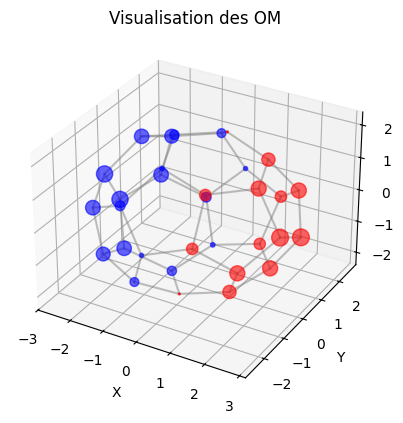

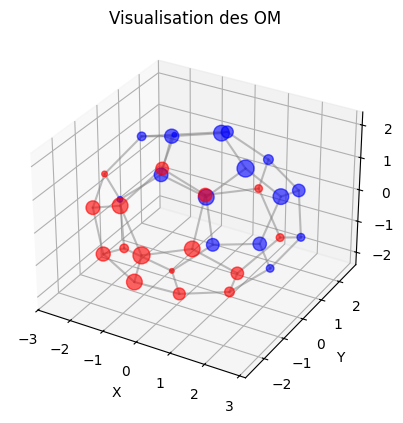

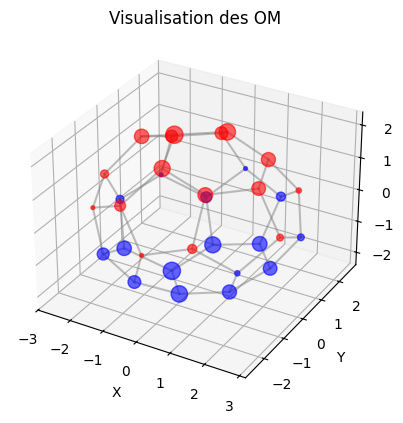


Force rotationnelle topologique HOMO→LUMO : R = 2.12027e-04


In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import sys

# Distances des liaisons simples et doubles entre atomes de carbone (en Å)
DISTANCES_LIAISONS = {
    ('C', 'C'): {'simple': 1.54, 'double': 1.34}}

TOLERANCE = 0.07  # Tolérance sur la distance (en Å)

#Lecture du fichier .xyz

def lire_xyz(fichier):
    """Lire un fichier .xyz et renvoyer les coordonnees des atomes dans l'ordre (x, y, z)."""
    try:
        with open(fichier, 'r') as file:
            lines = file.readlines()            
            # Nettoyer les lignes : enlever les espaces en trop, et ignorer les
            # lignes vides ou les commentaires
            lines = [line.strip() for line in lines if line.strip()]

            try:
                n = int(lines[0])
            except ValueError:
                print(
                    f"Erreur : La premiere ligne du fichier {fichier} ne contient pas un entier valide.")
                sys.exit(1)

            print(f"Nombre d'atomes dans le fichier : {n}")

            atomes = []
            # On commence à  la ligne 1 (index 1) car la ligne 1 du fichier original a été ignorée
            for i in range(1, n + 1):
                if i >= len(lines):
                    print(f"Erreur : Le fichier contient moins de lignes que prÃ©vu ({n} atomes).")
                    sys.exit(1)
                    
                ligne = lines[i].split()

                # Si la longueur de la ligne est inférieure à 4 valeurs = erreur ?
                if len(ligne) < 4:
                    print(
                        f"Erreur : Format incorrect Ã  la ligne {i+1} dans le fichier {fichier}.")
                    sys.exit(1)

                element = ligne[0]  # Le type d'element atomique
                try:
                    # Recuperer les coordonnees x, y et z
                    x, y, z = map(float, ligne[1:4])
                except ValueError:
                    print(
                        f"Erreur : Les coordonnees à la ligne {i+1} ne sont pas des nombres valides.")
                    sys.exit(1)
                atomes.append((element, x, y, z))  # Conserver cet ordre (x, y, z)
        return atomes
    except FileNotFoundError:
        print(f"Erreur : Le fichier {fichier} n'existe pas.")
        sys.exit(1)

#Calcul distance entre deux atomes pour savoir s'ils sont liés
def calcul_distance(coord1, coord2):
    delta_x = coord1[0] - coord2[0]
    delta_y = coord1[1] - coord2[1]
    delta_z = coord1[2] - coord2[2]
    sum_of_squares = delta_x**2 + delta_y**2 + delta_z**2
    return np.sqrt(sum_of_squares)

#Calcul du type de liaison (simple ou double) entre les atomes liés
#def type_liaison(atom1, atom2, distance):
    # Cherche la table dans les deux sens (A,B) ou (B,A)
    types = DISTANCES_LIAISONS.get((atom1, atom2)) or DISTANCES_LIAISONS.get((atom2, atom1))
    if types:
        for l_type, l_dist in types.items():
            if abs(distance - l_dist) < TOLERANCE:
                return l_type
    return None

#Construction de la matrice adjacente
def matrice_adjacente(atomes):
    n = len(atomes)
    Distance_max_liaison = 1.5
    matrice = np.zeros((n, n), dtype=float)
    for ielem in range(n):
        xi = atomes[ielem][1]
        yi = atomes[ielem][2]
        zi = atomes[ielem][3]
        for jelem in range (ielem+1, n):
            xj = atomes[jelem][1]
            yj = atomes[jelem][2]
            zj = atomes[jelem][3]
            dist = np.sqrt( (xj-xi) ** 2 + (yj-yi) ** 2 + (zj-zi) ** 2)
            if dist < Distance_max_liaison :
                matrice[ielem,jelem] = matrice[jelem,ielem] = 1.0
    return matrice

#Calcul de l'énergie de la molécule en fonction de alpha et beta
def energie_pi(H):
    valeurs, vecteurs_propres = np.linalg.eigh(H)
    valeurs = sorted(valeurs, reverse=True)
    n_electrons = H.shape[0]
    OM_occupees = n_electrons // 2
    E_pi = 2 * sum(valeurs[:OM_occupees])
    return E_pi, valeurs, vecteurs_propres

#Affichage/Visualisation des OM
def afficher_orbitale(atomes, vecteur_propre, titre="Orbitale moléculaire", projection='2d', matrice_adj=None):
    fig = plt.figure()
    if projection == '3d':
        ax = fig.add_subplot(111, projection='3d')
    else:
        ax = fig.add_subplot(111)

    xs = [a[1] for a in atomes]
    ys = [a[2] for a in atomes]
    zs = [a[3] for a in atomes]

    tailles = [abs(c) * 500 for c in vecteur_propre]  # Taille de la bulle proportionnelle au coeff
    couleurs = ['red' if c > 0 else 'blue' for c in vecteur_propre]

    if matrice_adj is not None:
        for i in range(len(atomes)):
            for j in range(i+1, len(atomes)):
                if matrice_adj[i, j] != 0:
                    x_coords = [xs[i], xs[j]]
                    y_coords = [ys[i], ys[j]]
                    if projection == '3d':
                        z_coords = [zs[i], zs[j]]
                        ax.plot(x_coords, y_coords, z_coords, color='gray', alpha=0.5)
                    else:
                        ax.plot(x_coords, y_coords, color='gray', alpha=0.5)

    if projection == '3d':
        ax.scatter(xs, ys, zs, s=tailles, c=couleurs, alpha=0.6)
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.set_zlabel('Z')
    else:
        ax.scatter(xs, ys, s=tailles, c=couleurs, alpha=0.6, edgecolors='k')
        ax.set_xlabel('X')
        ax.set_ylabel('Y')
        ax.axis('equal')

    ax.set_title('Visualisation des OM')
    plt.show()

#Calcul Rab Force rotationnelle topologique dans la transition HOMO vers LUMO
def force_rotationnelle_topologique(atomes, A, vecs, index_HOMO, index_LUMO, indices_coord):
    a = vecs[:, index_HOMO]
    b = vecs[:, index_LUMO]

    # Coordonnées topologiques à partir des vecteurs propres
    x = vecs[:, indices_coord[0]]
    y = vecs[:, indices_coord[1]]
    z = vecs[:, indices_coord[2]]

    R = 0.0
    n = len(atomes)
    for i in range(n):
        r_i = np.array([x[i], y[i], z[i]])
        aibi = a[i] * b[i]

        sum_inner = np.zeros(3)
        for k in range(n):
            for l in range(n):
                if A[k, l] != 0:
                    delta_r = np.array([x[k] - x[l], y[k] - y[l], z[k] - z[l]])
                    sum_inner += A[k, l] * a[k] * b[l] * delta_r

        R += aibi * np.dot(r_i, sum_inner)
    return R

def main():
    fichier_xyz = 'C32-C2-4.xyz'                                        #<-- Placer le nom du fichier sur cette ligne
    atomes = lire_xyz(fichier_xyz)
    #print(atomes)
    matrice_adjacence = matrice_adjacente(atomes)

    print("\nMatrice d'adjacence :")
    print(matrice_adjacence)

    # Calcul de l'énergie pi
    E_pi, valeurs, vecteurs_propres = energie_pi(matrice_adjacence)
    print("\nValeurs propres de la matrice de Hückel :", valeurs)
    print(valeurs[0], valeurs[-1])
    print(f"Énergie π totale : E_pi = {E_pi} β + {len(matrice_adjacence)} α")

    HOMO_index = len(atomes) // 2 - 1
    #afficher_orbitale(atomes, vecteurs_propres[:, HOMO_index], "HOMO", projection='3d', matrice_adj=matrice_adjacence)
    LUMO_index = HOMO_index + 1
    #afficher_orbitale(atomes, vecteurs_propres[:, LUMO_index], "LUMO", projection='3d', matrice_adj=matrice_adjacence)
    
    indices_stables = [-2, -3, -4]
    for i, idx in enumerate(indices_stables, start=1):
        titre = f"OM la plus stable n°{i} (valeur propre = {valeurs[idx]:.2f})"
        afficher_orbitale(atomes, vecteurs_propres[:, idx], titre, projection='3d', matrice_adj=matrice_adjacence)
    plt.pause(0.1)

    R_topologique = force_rotationnelle_topologique(atomes, matrice_adjacence, vecteurs_propres,
                                                    HOMO_index, LUMO_index, indices_stables)

    print(f"\nForce rotationnelle topologique HOMO→LUMO : R = {R_topologique:.5e}")

if __name__ == "__main__":
    main()
